The correlation coefficient is approx: r = -0.256


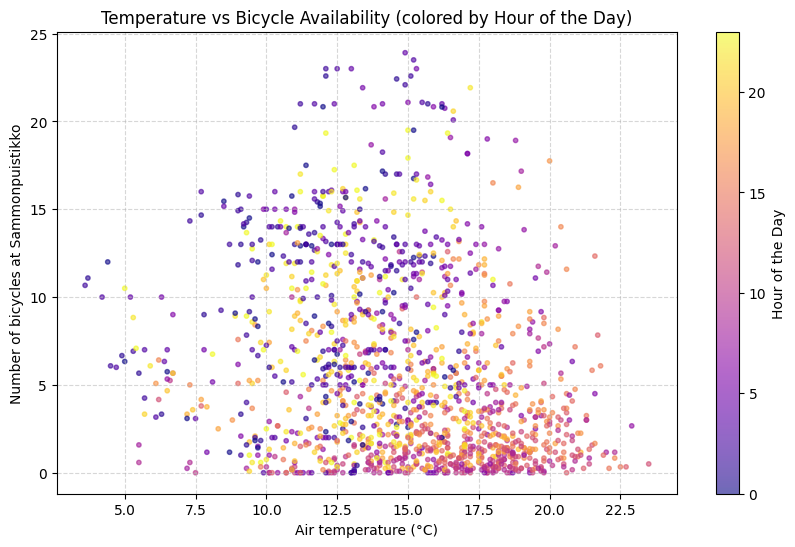

In [ ]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

# Load input csv data related to public city bicycles into pandas DataFrame
df_bicycles = pd.read_csv("exrc03p01_bicycles.csv")

# # Get basic information about data
# df_bicycles.info() # prints concise summary about DataFrame's structure
# print(df_bicycles.head()) # prints first five rows - default

# '''
# Bicycles data observation
# total 1442 rows
# No Null values for Month, Day and Hour columns, all are types on integer
# No Null value for Sammonpuistikko city data
# '''

# Load input CSV data related to hourly weather observations into pandas DataFrame
df_weather = pd.read_csv("exrc03p01_weather.csv")

# # Get basic information about data
# df_weather.info() # prints concise summary about DataFrame's structure
# print(df_weather.head()) # prints first five rows - default

# '''
# Weather data observation
# total 1464 rows 
# No Null values for month, day, time
# month and day columns values are integers
# time column values are object type with value like 01:00, 02:00
# '''

# Convert the 'time' column value and type to int, like 01:00 to 1 and 02:00 t0 2
# Used Pandas DataFrame's string methond ´split()´ along with ´astype()´ to convert datatype
df_weather["time"] = df_weather["time"].str.split(":").str[0].astype(int)

# # Print sample weather data for debugging post changing the ´time´ coloumn data 
# df_weather.info() # prints concise summary about DataFrame's structure
# print(df_weather.head()) # prints first five rows - default

# # Print Column names of both DataFrames to indentify merging columns
# print("Columns in df_bicycles DataFrame:", df_bicycles.columns)
# print("Columns in df_weather DataFrame:", df_weather.columns)

# Rename coloumn names for df_weather to match with df_bycyles to perform join operation
# Used Pandas DataFrame method ´rename()´
df_weather = df_weather.rename(columns={"month":"Month", "day":"Day", "time":"Hour"})

# # Print column names for debugging
# print("Columns in df_bicycles DataFrame post processing:", df_bicycles.columns)
# print("Columns in df_weather DataFrame post processing:", df_weather.columns)

# Combined dataframes df_bicyles and df_weather on ´Month´, ´Day´and ´Hour´ columns
# Used Pandas DataFrame method ´merge()' combine the bicycles and weather data
# ´on´ paramter used to provide on which column/s merge to be performed
# ´how´ parameter used to provide yype of merge to be performed. Used 'outer' to combine data from both DataFrames (ie union)
# ´índicator´ parameter set to 'True' to add a column to the output DataFrame called “_merge” with information on the source of each row
df_merged = pd.merge(df_bicycles, df_weather, on=["Month", "Day", "Hour"], how="outer", indicator = True )

# # Print sample for debugging
# df_merged.info()
# print(df_merged.head())
# print(df_merged.tail())
# print(df_merged.columns)

# Remove any row where column 'Sammonpuistikko' contain NaN
# Used Pandas DataFrame method ´dropna()´
df_cleaned = df_merged.dropna(subset=['Sammonpuistikko'])

# # Print sample for debugging post removing the NaN entries and load into csv
# df_cleaned.info()
# df_cleaned.to_csv("exrc_03_cleaned_output.csv", index=False)

# Calculate the correlation coefficient between air temperature & the number of available bicycles at the Sammonpuistikko station
r = df_cleaned["Sammonpuistikko"].corr(df_cleaned["air temperature (degC)"])
print(f"The correlation coefficient is approx: r = {r:.3f}")

# '''
# The correlation coefficient is approx: r = -0.256
# The relationship between air temperature and number of available bicycles at Sammonpuistikko is weak and negative.
# Which means as temperature increases, the number of available bicycles tends to decrease slightly, but not strongly.
# Temperature is not the only factor affecting availability. Time of day, weekday/weekend are other factors which affect it too.
# '''

# Plot a scatterplot to visualise the correlation coefficient between the temperature and the number of available bicycles at the Sammonpuistikko station
# Shows the impact of day of the time too for better clarity
# Used pyplot module from matplot libray

plt.figure(figsize=(10,6))
plt.title("Temperature vs Bicycle Availability (colored by Hour of the Day)")
scatter = plt.scatter(
    df_cleaned["air temperature (degC)"],  # x axis
    df_cleaned["Sammonpuistikko"],         # y axis
    c=df_cleaned["Hour"],                  # color by Hour of Day
    cmap="plasma",                         # good color map for continuous time
    alpha=0.6,                             # for better transparency
    s = 10                                 # for marker size
)
plt.colorbar(scatter, label="Hour of the Day")
plt.xlabel("Air temperature (°C)")
plt.ylabel("Number of bicycles at Sammonpuistikko")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()